In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 20
COLORS=[(44/255, 160/255, 44/255, 1), (255/255, 127/255, 14/255, 1), (214/255, 39/255, 40/255, 1), (31/255, 119/255, 180/255, 1)]
# COLORS=(255, 0, 0)

In [2]:
df = pd.read_csv('./out/database.csv')
df.head()

,gid,date,game,players,winner
0,1,26/9/20,Lhama,David,Isela
1,1,26/9/20,Lhama,Arturo,Isela
2,1,26/9/20,Lhama,Isela,Isela
3,2,26/9/20,Lhama,David,Isela
4,2,26/9/20,Lhama,Arturo,Isela


In [3]:
winners = list()
for row in df['gid'].unique():
    winners.append(df[df['gid'] == row]['winner'].values[0])

In [4]:
games_by_players = df.groupby(['game', 'players']).agg({'players': ['count']})#.reset_index()
games_by_players.head()

players
                     count
game       players        
Bohnanza   Adriano       3
           Arturo        4
           David         2
           Isela         4
Encantados Adriano       2

In [5]:
total_games = games_by_players['players'].groupby(['players']).agg({'count': 'sum'})
total_games.head()

,count
players,
Adriano,16
Arturo,39
David,30
Isela,39


In [6]:
players_names = df['players'].unique()

total_efficience = dict()
hist_winners = dict()

for player in players_names:
    player_df = total_games.loc[player]['count']
    victories = len(list(
        filter(
            lambda i: i == player, winners
        )
    ))
    total_efficience[player] = (victories/player_df)*100
    hist_winners[player] = victories

In [7]:
game_efficience = dict(
    game = list(), player = list(), efficience = list()
)
for player in df['players'].unique():
    for game in df['game'].unique():
        vic = df.query("game == '{0}' and players == '{1}' and winner == '{1}'".format(game, player))
        try:
            par = games_by_players.loc[game].loc[player][0]
            game_efficience['game'].append(game)
            game_efficience['player'].append(player)
            game_efficience['efficience'].append((vic.count()[0]/par)*100)
        except KeyError:
            game_efficience['game'].append(game)
            game_efficience['player'].append(player)
            game_efficience['efficience'].append(0)

game_efficience = pd.DataFrame(game_efficience).astype({'efficience': int})
game_efficience.head()

,game,player,efficience
0,Lhama,David,63
1,Port Royal,David,33
2,Munchkin,David,0
3,Encantados,David,33
4,Saboteur,David,0


In [8]:
game_pivot = game_efficience.pivot("game", "player", "efficience")
game_pivot

player,Adriano,Arturo,David,Isela
game,,,,
Bohnanza,0,25,0,75
Encantados,0,75,33,0
Lhama,33,13,63,26
Munchkin,0,50,0,50
Ninja Camp,0,100,0,0
Port Royal,0,62,33,12
Saboteur,0,100,0,0


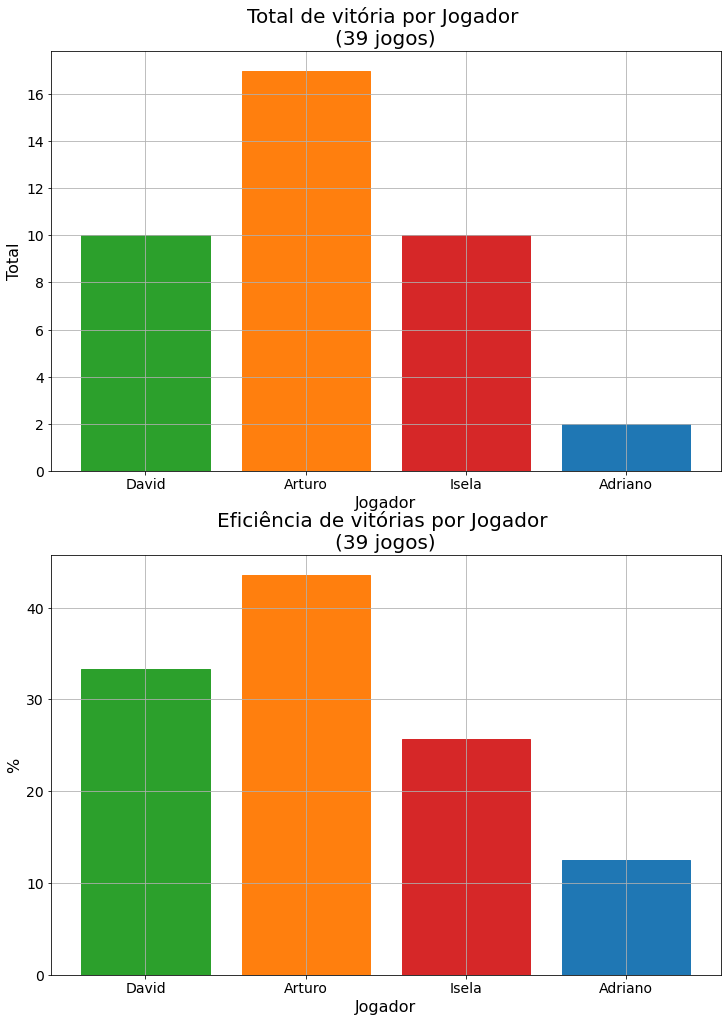

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12, 17))
ax[0].grid()
bars = ax[0].bar(hist_winners.keys(), hist_winners.values())
for i, color in enumerate(COLORS):
    bars[i].set_color(color)
ax[0].set_title('Total de vitória por Jogador \n(%d jogos)'%sum(hist_winners.values()))
ax[0].set_xlabel('Jogador')
ax[0].set_ylabel('Total')

ax[1].grid()
bars = ax[1].bar(total_efficience.keys(), total_efficience.values())
for i, color in enumerate(COLORS):
    bars[i].set_color(color)
ax[1].set_title('Eficiência de vitórias por Jogador \n(%d jogos)'%sum(hist_winners.values()))
ax[1].set_xlabel('Jogador')
ax[1].set_ylabel('%')

plt.savefig('./fig/general_statistics.png', facecolor='w')

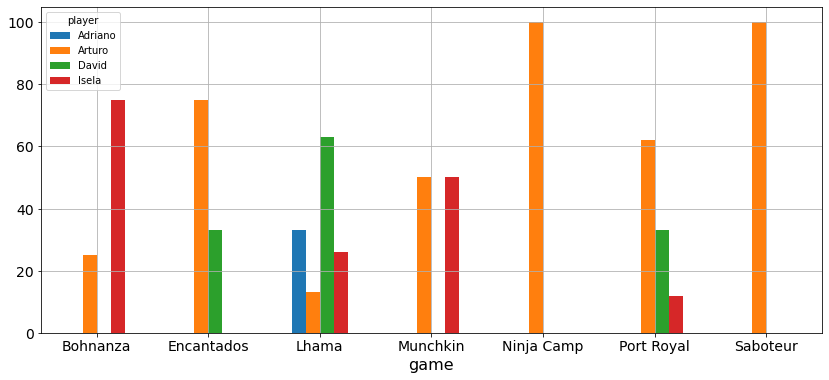

In [10]:
_, ax = plt.subplots(figsize=(14, 6))
bars = game_pivot.plot(kind='bar', grid=True, ax=ax)
ax.tick_params(axis='x', rotation=0)

plt.savefig("./fig/eficiencia_por_jogo.png", facecolor='w')